## Part 1-Sentiment Analysis using TextBlob

In [ ]:
# Import necessary libraries for TextBlob
from textblob import TextBlob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Function to analyze sentiment using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to read texts from a folder
def read_texts_from_folder(folder_path):
    texts = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
    return texts

In [6]:
# Folder paths for TextBlob
positive_folder_path_textblob = '/Users/vamcchekuri/Desktop/txt_sentoken/pos'
negative_folder_path_textblob = '/Users/vamcchekuri/Desktop/txt_sentoken/neg'

In [7]:
# Load data from folders for TextBlob
positive_texts_textblob = read_texts_from_folder(positive_folder_path_textblob)
negative_texts_textblob = read_texts_from_folder(negative_folder_path_textblob)

In [8]:
# Perform sentiment analysis using TextBlob
positive_scores_textblob = [analyze_sentiment_textblob(text) for text in positive_texts_textblob]
negative_scores_textblob = [analyze_sentiment_textblob(text) for text in negative_texts_textblob]

In [9]:
# Calculate accuracy for TextBlob
positive_accuracy_textblob = sum(score > 0 for score in positive_scores_textblob) / len(positive_scores_textblob)
negative_accuracy_textblob = sum(score < 0 for score in negative_scores_textblob) / len(negative_scores_textblob)

# Print report for TextBlob
print("TextBlob Sentiment Analysis")
print("Positive Texts Accuracy: {:.2%}".format(positive_accuracy_textblob))
print("Negative Texts Accuracy: {:.2%}".format(negative_accuracy_textblob))


TextBlob Sentiment Analysis
Positive Texts Accuracy: 97.10%
Negative Texts Accuracy: 22.90%


-------------------------------------------------------------------------------------------------------------------

**Report for part 1(Using Textblob):**
                           
                           TextBlob, a straightforward Python library for processing textual data, was employed to perform sentiment analysis on a dataset comprising 1000 positive and 1000 negative text samples. Utilizing TextBlob's sentiment analysis capabilities, each text was evaluated for polarity. A polarity score greater than 0 indicates a positive sentiment, less than 0 indicates a negative sentiment, and a score of 0 signifies neutrality.

Results:

Positive Texts: The analysis revealed an impressive accuracy of 97.10% in correctly identifying positive sentiments, showcasing TextBlob's strength in recognizing clear, positive expressions.

Negative Texts: In contrast, the accuracy for negative texts was significantly lower, at 22.90%. This suggests challenges in accurately detecting negative sentiments or nuances.
Observations

***TextBlob's high performance in positive sentiment detection highlights its effectiveness in scenarios with straightforward, clear-cut sentiments.
The marked discrepancy in its ability to handle negative sentiments points to potential limitations in dealing with complex or subtly expressed emotions.***


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Part 2- Sentiment Analysis using Vader

In [12]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.1 MB/s eta 0:00:01


In [14]:
# Import necessary libraries for VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
# Function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

In [16]:
# Folder paths for VADER
positive_folder_path_vader = '/Users/vamcchekuri/Desktop/txt_sentoken/pos'
negative_folder_path_vader = '/Users/vamcchekuri/Desktop/txt_sentoken/neg'

In [17]:
# Reuse the function 'read_texts_from_folder' to load data for VADER
positive_texts_vader = read_texts_from_folder(positive_folder_path_vader)
negative_texts_vader = read_texts_from_folder(negative_folder_path_vader)

In [18]:
# Perform sentiment analysis using VADER
positive_scores_vader = [analyze_sentiment_vader(text) for text in positive_texts_vader]
negative_scores_vader = [analyze_sentiment_vader(text) for text in negative_texts_vader]

In [19]:
# Calculate accuracy for VADER
positive_accuracy_vader = sum(score > 0 for score in positive_scores_vader) / len(positive_scores_vader)
negative_accuracy_vader = sum(score < 0 for score in negative_scores_vader) / len(negative_scores_vader)

# Print report for VADER
print("VADER Sentiment Analysis")
print("Positive Texts Accuracy: {:.2%}".format(positive_accuracy_vader))
print("Negative Texts Accuracy: {:.2%}".format(negative_accuracy_vader))

VADER Sentiment Analysis
Positive Texts Accuracy: 84.30%
Negative Texts Accuracy: 43.50%


-------------------------------------------------------------------------------------------------------------------

**Report for part 2(Using VADER):**
                           
                           VADER, a lexicon and rule-based sentiment analysis tool, is tailored for sentiments expressed in informal text, like social media. It was used to analyze the same dataset of 1000 positive and 1000 negative texts. VADER's sentiment analysis provides a compound score to summarize the sentiment of the text. Positive scores indicate positive sentiment, negative scores for negative sentiment, and scores around 0 for neutrality. Surprisingly VADER takes lot more time to execute and get results when compared the time lapse with text blob.

Results

Positive Texts: VADER achieved an 84.30% accuracy in identifying positive sentiments, demonstrating its capability but with a slightly lower proficiency compared to TextBlob.

Negative Texts: More notably, it showed a significantly higher accuracy of 43.50% for negative texts, outperforming TextBlob in this aspect.
Observations

***VADER's balanced performance in analyzing both positive and negative sentiments underscores its adaptability and strength in handling a variety of textual contexts.
The tool's nuanced understanding of informal, colloquial language likely contributes to its more effective identification of negative sentiments.***

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Comparision and Visualization of these two tools performance

In [27]:
# Provided accuracy results
textblob_accuracies = [0.9710, 0.2290]  # TextBlob accuracies for positive and negative texts
vader_accuracies = [0.8430, 0.4350]     # VADER accuracies for positive and negative texts

# Prepare data for comparison
data = {
    'TextBlob': textblob_accuracies,
    'VADER': vader_accuracies
}

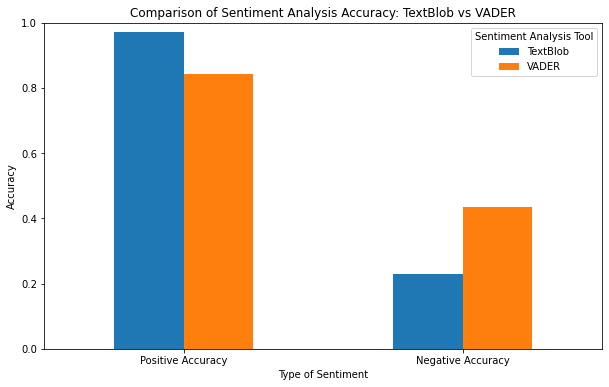

In [28]:
# Create a DataFrame for easier plotting
df = pd.DataFrame(data, index=['Positive Accuracy', 'Negative Accuracy'])

# Plotting
df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Sentiment Analysis Accuracy: TextBlob vs VADER')
plt.ylabel('Accuracy')
plt.xlabel('Type of Sentiment')
plt.xticks(rotation=0)  # To keep the x-labels horizontal for readability
plt.legend(title='Sentiment Analysis Tool')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracies as percentages
plt.show()

-------------------------------------------------------------------------------------------------------------------

***ANALYSIS-***

The comparative analysis of TextBlob and VADER showcases distinct strengths and weaknesses in sentiment analysis tasks. TextBlob excelled in identifying positive sentiments with a remarkable accuracy of 97.10%, but its performance dropped significantly when analyzing negative sentiments, with an accuracy of only 22.90%. In contrast, VADER presented a more balanced approach, achieving 84.30% accuracy for positive sentiments and a notably higher 43.50% accuracy for negative sentiments.

***INSIGHTS-***

TextBlob's high accuracy in positive sentiment detection makes it a suitable choice for applications where the primary goal is to identify positive expressions, such as customer satisfaction surveys.

VADER's balanced accuracy across both sentiment types, particularly its superior performance in detecting negative sentiments, makes it a versatile tool for diverse applications, including social media analysis and market research.

The choice between TextBlob and VADER should be influenced by the specific requirements of the sentiment analysis task and the nature of the text data.

***Conclusion***

In conclusion, while TextBlob shows exceptional ability in identifying positive sentiments, VADER's strength lies in its balanced performance and nuanced understanding of both positive and negative sentiments. The selection of the appropriate tool thus depends on the specific needs and nature of the sentiment analysis task at hand.